# Лабораторная работа №6
# Бинарная классификация

Бинарная (двоичная) классификация (binary classification) — это задача классификации элементов заданного набора данных в два класса. 

Для бинарной классификации могут применяться методы многоклассовой классификации, а также более специализированные методы, такие, как метод опорных векторов, логистическая регрессия, линейный дискриминантный анализ и др.

## Логистическая регрессия

Логистическая регрессия — это статистическая модель для бинарной классификации, использующая логистическую функцию (кривую). 

### Логистическая функция (сигмоида)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(t):
    return 1. / (1. + np.exp(-t))

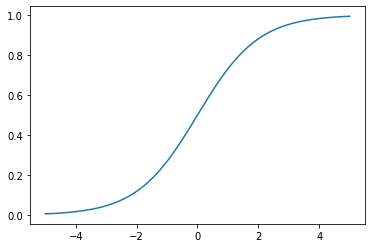

In [3]:
x = np.linspace(-5, 5, 500)

plt.plot(x, sigmoid(x));

### Бинарная классификация при помощи логистической регрессии

Будем использовать набор данных Ирисы:

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

In [134]:
X = iris.data
y = iris.target

Оставим в наборе данных первые два признака из четырех и первые два класса из трех:

In [135]:
X = X[y<2,:2]
y = y[y<2]

In [136]:
X.shape, y.shape

((100, 2), (100,))

Визуализируем классы на плоскости:

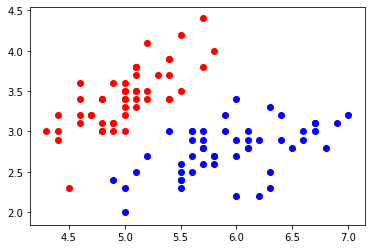

In [8]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue");

Разобьем набор данных на обучающую и тестовую выборки:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

Создадим и обучим классификатор логистической регрессии:

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

Классификатор не допускает ошибок на тестовой выборке:

In [11]:
log_reg.score(X_test, y_test)

1.0

In [12]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

### Граница решения 

В задаче бинарной классификации граница решения (поверхность решения) - это гиперповерхность, которая разделяет пространство признаков на два набора, по одному для каждого класса. Классификатор классифицирует все точки по одной стороне границы принятия решения как принадлежащие одному классу, а все точки на другой стороне как принадлежащие другому классу. На самой границе решения прогнозируемая классификатором метка класса неоднозначна. 

Если граница решения является гиперплоскостью, то задача классификации линейна и классы линейно разделимы. 

Логистическая регрессия - это линейный классификатор и граница решения характеризуется следующими коэффициентами:

In [14]:
log_reg.coef_

array([[ 2.78090985, -2.71686283]])

In [15]:
log_reg.intercept_

array([-6.54621544])

Таким образом, прямая, разделяющая точки набора данных задается следующим образом: 

In [16]:
def x2(x1):
    return (-log_reg.coef_[0][0] * x1 - log_reg.intercept_[0]) / log_reg.coef_[0][1]

Визуализируем эту прямую и точки исходного набора данных и тестовой выборки:

In [17]:
x1_plot = np.linspace(4, 7, 1000)
x2_plot = x2(x1_plot)

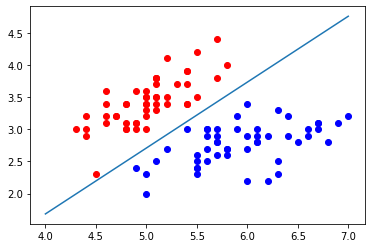

In [18]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot);

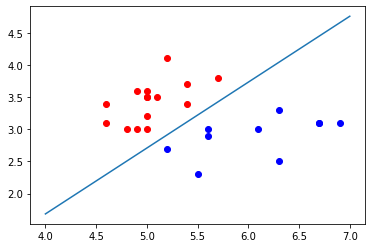

In [19]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot);

Будем использовать следующую функцию для визуализации границы решения:

In [20]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    

Граница решения для классификатора логистической регрессии:

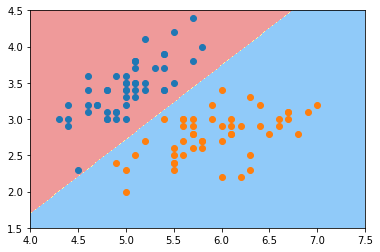

In [21]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

### Граница решения для нелинейного классификатора

Рассмотрим классификатор на основе метода К ближайших соседей:

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train);

In [23]:
knn_clf.score(X, y)

0.99

Граница решения теперь является нелинейной:

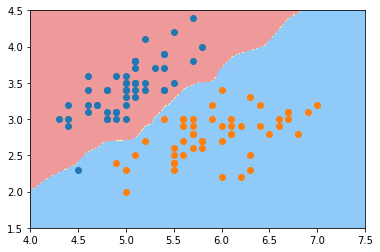

In [24]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

Обучим теперь классификатор на полном наборе данных:

In [25]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target);

Граница решения стала более извилистой:

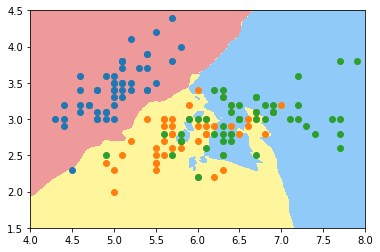

In [26]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1]);

Если метка класса определяется по 50 ближайшим соседям, то получим такую визуализацию границы:

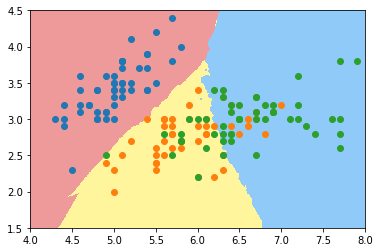

In [27]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1]);

### Метод рекурсивного исключения признаков (RFE)

Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм: модель обучается на исходном наборе признаков и оценивает их значимость, затем исключается один или несколько наименее значимых признаков, модель обучается на оставшихся признаках, и так далее, пока не останется заданное количество лучших признаков. 

Метод RFE может применяться в сочетании с логистической регрессией для отбора лучших признаков: 

In [28]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
X = iris.data
y = iris.target
# feature extraction
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X, y);

In [29]:
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 2
Выбранные признаки: [False False  True  True]
Ранг признаков: [3 2 1 1]


Выбранным (оцененым как лучшие) признакам присвоен ранг 1.

## Линейный дискриминантный анализ (LDA)

Метод анализа основных компонентов PCA определяет комбинации признаков (основные компоненты), для которых набор данных имеет наибольшую дисперсию.

Метод линейного дискриминантного анализа (LDA) определяет комбинации признаков, для которых классы разделяются наилучшим образом. LDA, в отличие от PCA, является методом машинного обучения с учителем, использующим заданные  метки классов.

In [30]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = iris.data
y = iris.target
target_names = iris.target_names

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

In [32]:
X_lda

array([[-8.06179978e+00,  3.00420621e-01],
       [-7.12868772e+00, -7.86660426e-01],
       [-7.48982797e+00, -2.65384488e-01],
       [-6.81320057e+00, -6.70631068e-01],
       [-8.13230933e+00,  5.14462530e-01],
       [-7.70194674e+00,  1.46172097e+00],
       [-7.21261762e+00,  3.55836209e-01],
       [-7.60529355e+00, -1.16338380e-02],
       [-6.56055159e+00, -1.01516362e+00],
       [-7.34305989e+00, -9.47319209e-01],
       [-8.39738652e+00,  6.47363392e-01],
       [-7.21929685e+00, -1.09646389e-01],
       [-7.32679599e+00, -1.07298943e+00],
       [-7.57247066e+00, -8.05464137e-01],
       [-9.84984300e+00,  1.58593698e+00],
       [-9.15823890e+00,  2.73759647e+00],
       [-8.58243141e+00,  1.83448945e+00],
       [-7.78075375e+00,  5.84339407e-01],
       [-8.07835876e+00,  9.68580703e-01],
       [-8.02097451e+00,  1.14050366e+00],
       [-7.49680227e+00, -1.88377220e-01],
       [-7.58648117e+00,  1.20797032e+00],
       [-8.68104293e+00,  8.77590154e-01],
       [-6.

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Визуализации для методов PCA и LDA отличаются:

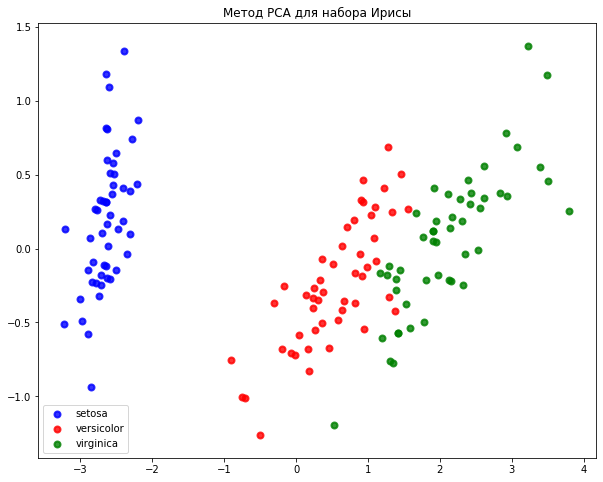

In [34]:
plt.figure(figsize=(10,8))
colors = ['b', 'r', 'g']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод PCA для набора Ирисы');

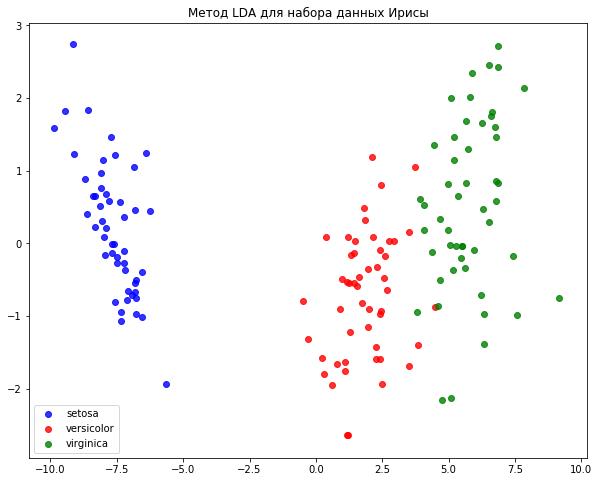

In [35]:
plt.figure(figsize=(10,8))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод LDA для набора данных Ирисы');

В методе PCA определяются главные компоненты (комбинации признаков):

In [36]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

В методе LDA определяется направление (вектор), наилучшим образом разделяющий точки классов:

In [37]:
lda.coef_

array([[  6.31475846,  12.13931718, -16.94642465, -20.77005459],
       [ -1.53119919,  -4.37604348,   4.69566531,   3.06258539],
       [ -4.78355927,  -7.7632737 ,  12.25075935,  17.7074692 ]])

In [38]:
lda.intercept_

array([-15.47783673,  -2.02197415, -33.53768674])

Применим метод LDA для классификации точек набора Ирисы (с двумя признаками и двумя классами):

In [39]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train);

In [40]:
lda.score(X_test, y_test)

1.0

In [41]:
lda.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [42]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

Граница решения является линейной:

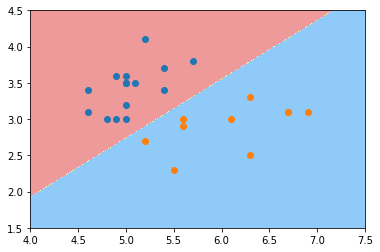

In [43]:
plot_decision_boundary(lda, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1]);

## Метод опорных векторов (SVM)

Метод опорных векторов (метод построения оптимальной разделяющей гиперплоскости) был разработан В. Вапником и А. Червоненкисом. 

In [44]:
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

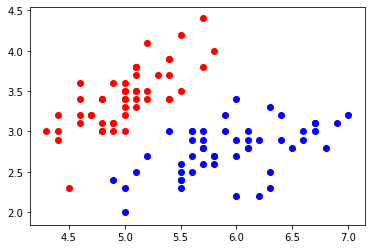

In [45]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue');

Стандартизуем набор данных:

In [46]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

Создадим и обучим классификатор на основе SVM с параметром регуляризации C=1e9:

In [47]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y);

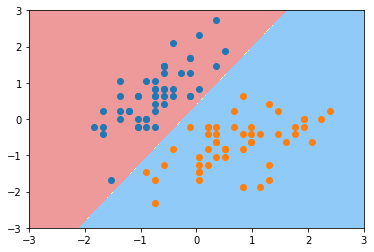

In [48]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1]);

Создадим и обучим на тех же данных классификатор на основе SVM с другим параметром регуляризации:

In [49]:
svc2 = LinearSVC(C=10.)
svc2.fit(X_standard, y);

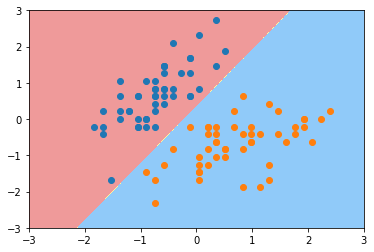

In [50]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1]);

Граница решения определяется такими параметрами:

In [51]:
svc2.coef_

array([[ 3.15651605, -2.01277351]])

In [52]:
svc2.intercept_

array([0.66495089])

Для визуализации зазора метода SVM будем использовать следующую функцию:

In [53]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

Визуализации для первого и второго классификаторов имеют следующий вид:

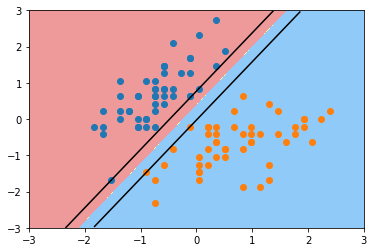

In [54]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1]);

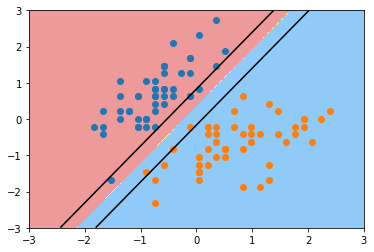

In [55]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1]);

## Классификация нелинейного набора данных при помощи логистической регрессии

Рассмотрим следующий синтетический набор данных:

In [56]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')

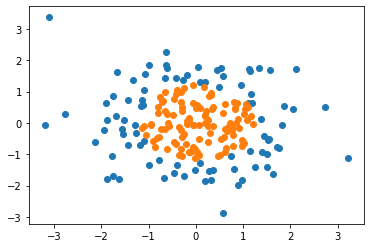

In [57]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

Классификация набора при помощи логистической регрессии дает низкое качество классификации:

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X, y);

In [59]:
log_reg.score(X, y)

0.605

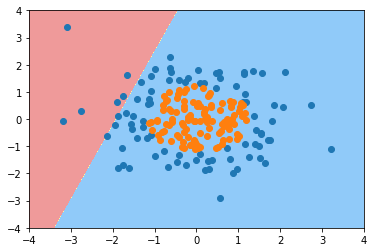

In [60]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

### Полиномиальные зависимости

Класс `PolynomialFeatures` позволяет строить наборы данных, содержащий полиномиальные зависимости от исходных данных (столбцы $x_1, x_2$ в наборе $D$):

In [61]:
D = np.arange(1, 11).reshape(-1, 2)
D

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [62]:
from sklearn.preprocessing import PolynomialFeatures

polyD = PolynomialFeatures(degree=2) # степень полинома
polyD.fit(D)
D_2 = polyD.transform(D)
D_2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

Получаем новый набор, в котором первый столбец соответствует свободному члену (не зависит от $x_1$, $x_2$), второй и третий столбцы равны $x_1$ и $x_2$, четвертый столбец равен $x_1^2$, пятый столбец равен $x_1 x_2$, шестой столбец равен $x_2^2$. 

Таким образом, от признаков $(x_1, x_2)$ переходим к расширенному набору признаков $(1, x_1, x_2, x_1^2, x_1 x_2, x_2^2)$.

### Построение конвейера (Pipeline)

Цель конвейера (pipeline) состоит в том, чтобы собрать несколько преобразований и заключительный классификатор, которые могут быть исполнены вместе с установкой различных параметров.

In [63]:
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

Применим конвейер с параметром `degree=2` для классификации нелинейного набора, приведенного выше:

In [64]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y);

In [65]:
poly_log_reg.score(X, y)

0.96

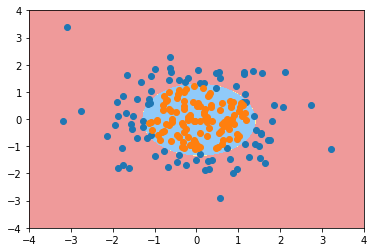

In [66]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

Можно увеличить параметр `degree` до 20:

In [67]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y);

In [68]:
poly_log_reg2.score(X, y)

0.96

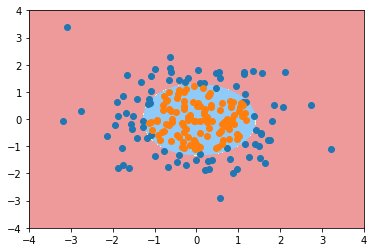

In [69]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

### Параметры логистической регрессии

Реализация логистической регрессии в __sklearn__ допускает некоторое количество параметров, в частности:

* `penalty` - штраф, принимающий значения ‘l1’, ‘l2’, ‘elasticnet’ или ‘none’
* `C` - константа регуляризации (обратно пропорциональна силе регуляризации)
* `solver` - алгоритм, используемый для оптимизации, принимающий значения ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

Рассмотрим другой синтетический набор данных:

In [70]:
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

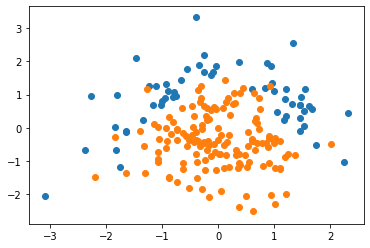

In [71]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [73]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

In [74]:
log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.8133333333333334, 0.82)

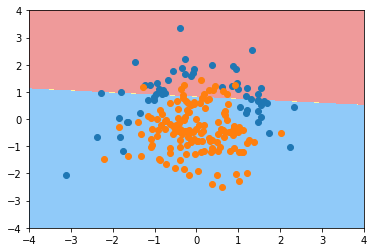

In [75]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

In [76]:
def PolynomialLogisticRegression(degree=2, C=1.):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [77]:
poly_log_reg3 = PolynomialLogisticRegression(degree=2, C=0.1)
poly_log_reg3.fit(X_train, y_train);

In [78]:
poly_log_reg3.score(X_train, y_train), poly_log_reg3.score(X_test, y_test)

(0.8866666666666667, 0.88)

### Классификация нелинейного набора данных при помощи SVM

Создадим нелинейный набор данных в форму пулумесяцев:

In [79]:
from sklearn import datasets

X, y = datasets.make_moons()
X.shape, y.shape

((100, 2), (100,))

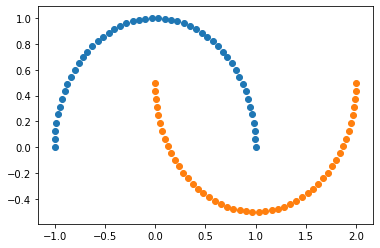

In [80]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

Добавим шум:

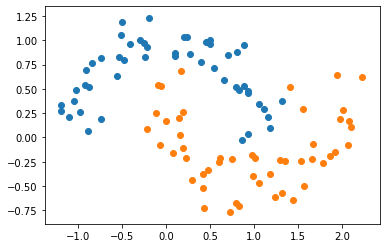

In [81]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

Создадим конвейер на основе SVM:

In [82]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [83]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)
poly_svc.score(X, y)

0.96

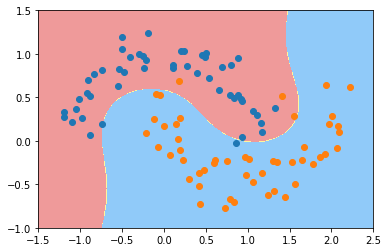

In [84]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]);

## Матрица ошибок, точность и полнота

Продемонстрируем меры бинарной классификации на примере набора данных с изображениеми цифр:

In [85]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

Обучим классификатор логистической регрессии:

In [87]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9844444444444445

In [88]:
y_log_predict = log_reg.predict(X_test)

Показатели TN, FP, FN и TP могут быть реализованы так:

In [89]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

In [90]:
TN(y_test, y_log_predict)

404

In [91]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

In [92]:
FP(y_test, y_log_predict)

1

In [93]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [94]:
FN(y_test, y_log_predict)

6

In [95]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

In [96]:
TP(y_test, y_log_predict)

39

Матрица ошибок для бинарной классификации определяется так:

In [97]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [98]:
confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  6,  39]])

Показатель точности для положительного класса может быть вычислен так:

In [99]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    

In [100]:
precision_score(y_test, y_log_predict)

0.975

Показатель TPR (доля корректно спрогнозированных положительных точек) вычисляется так:

In [101]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    

In [102]:
recall_score(y_test, y_log_predict)

0.8666666666666667

При использовании функций из scikit-learn получим аналогичные результаты:

In [103]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  6,  39]], dtype=int64)

In [104]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.975

In [105]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8666666666666667

### Кривая полнота-точность (precision-recall)

Кривая полнота-точность строится в координатах полнота (recall) и точность (precision). Площадь под кривой часто используют в качестве метрики качества алгоритма. Площадь под кривой полнота-точность  рекомендуют использовать в задачах с дисбалансом классов.

In [130]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [132]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [109]:
decision_scores

array([-1.75493462e+01, -2.78866778e+01, -1.75013027e+01, -8.00835544e+01,
       -4.80492161e+01, -2.00581098e+01, -4.08530739e+01, -2.68267306e+01,
       -1.23352442e-01, -2.70576779e+01, -6.60814949e+01, -4.54660859e+01,
       -2.88020070e+01, -4.21341442e+01, -3.86175963e+01, -3.00148584e+01,
       -3.73095796e+01, -7.52130037e+01, -4.01038356e+01, -1.50619089e+01,
       -7.65368311e+00, -7.52523080e+01, -1.44247650e+01, -4.63399448e+01,
       -4.39306993e+00, -5.16419902e+01, -1.06153715e+01, -3.02549190e+01,
       -2.09455399e+01, -1.47897607e+01, -1.57189290e+01, -2.39867368e+01,
       -3.87284533e+01, -2.25885023e+01, -8.75343223e+00, -3.46549949e+00,
       -2.50993486e+01, -2.89267174e+01, -3.11596074e+01, -2.07062044e+01,
       -2.33813348e+01, -6.08688426e+01, -3.97209233e+01, -6.10342920e+01,
       -1.99016538e+01, -9.13698204e+00, -1.73313535e+01, -1.99806589e+01,
       -2.92034421e+01, -3.00471361e+01,  4.07867345e+00,  1.14972146e+01,
       -3.02632096e+01, -

In [110]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
thresholds

array([-80.08355443, -79.98355443, -79.88355443, ...,  20.61644557,
        20.71644557,  20.81644557])

In [111]:
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

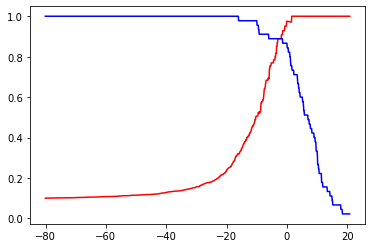

In [112]:
plt.plot(thresholds, precisions, c='r')
plt.plot(thresholds, recalls, c='b')
plt.show()

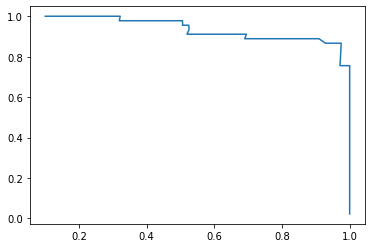

In [113]:
plt.plot(precisions, recalls)
plt.show()

In [114]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [115]:
precisions.shape

(140,)

In [116]:
recalls.shape

(140,)

In [117]:
thresholds.shape

(139,)

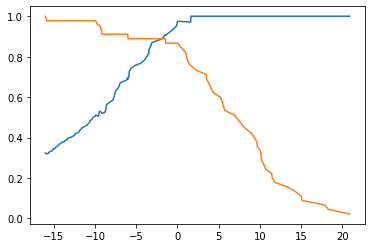

In [118]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

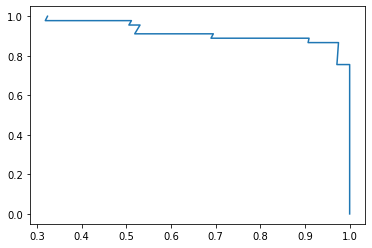

In [119]:
plt.plot(precisions, recalls)
plt.show()

## Анализ ROC кривых

Площадь под ROC-кривой – одна из самых популярных мер качества в задачах бинарной классификации. 

In [120]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

Для ROC-анализа нужны значения т.н. скоринговой функции для каждой точки в тестовом наборе.

In [122]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

Вдоль осей откладываются показатели FPR (ось абсцисс) и TPR (ось ординат):

In [123]:
fprs = []
tprs = []
n = len(X_test)
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FP(y_test, y_predict)/n)
    tprs.append(TP(y_test, y_predict)/n)

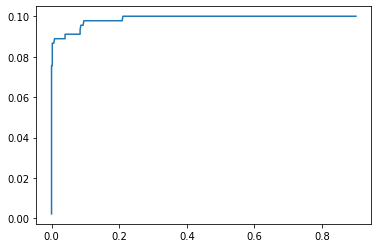

In [124]:
plt.plot(fprs, tprs)
plt.show()

Использование библиотечной функции дает тот же результат:

In [125]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

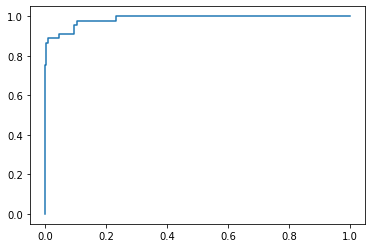

In [126]:
plt.plot(fprs, tprs)
plt.show()

Для вычисления площади под кривой можно использовать метод трапеций или библиотечную функцию:

In [127]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9868861454046639

### Задание на лабораторную работу №6

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. 

3.	Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками. 

4.	Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

5.	Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации.

6.	Масштабируйте признаки набора данных на интервал от 0 до 1.

7.	Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе: 

* наивного байесовского классификатора 
* логистической регрессии 
* логистической регрессии с полиномиальными зависимостями (`degree` равно 2 и 3)
* линейного дискриминантного анализа  
* метода опорных векторов
* метода опорных векторов с полиномиальными зависимостями (`degree` равно 2 и 3)

8. 	Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных. 

9. 	Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации. 

10.	Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой). 
